In [1]:
from sklearn.datasets import make_circles
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [2]:
X,Y = make_circles(n_samples=500, noise=0.02)

In [3]:
print(X.shape,Y.shape)

(500, 2) (500,)


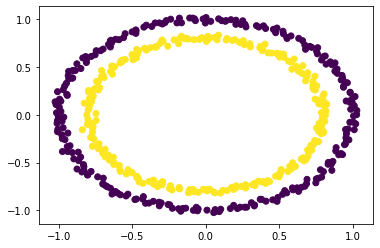

In [4]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [5]:
def phi(X):
    """Nonlinear transformation"""
    
    X1 = X[:,0]
    X2 = X[:,1]
    X3 = X1**2 + X2**2
    
    X_ = np.zeros((X.shape[0],3))
    print(X_.shape)
    X_[:,:-1] =X
    X_[:,-1] = X3
    
    return X_

In [6]:
X_ = phi(X)

(500, 3)


In [7]:
print(X[:3])
print(X_[:3])

[[-0.08388945 -1.00060496]
 [-0.29069361  0.76951715]
 [ 0.66175523  0.51550682]]
[[-0.08388945 -1.00060496  1.00824773]
 [-0.29069361  0.76951715  0.67665942]
 [ 0.66175523  0.51550682  0.70366726]]


In [8]:
def plot3d(X,show=True):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111,projection='3d')
    X1 = X[:,0]
    X2 = X[:,1]
    X3 = X[:,2]
    
    ax.scatter(X1,X2,X3,zdir='z',s=20,c=Y,depthshade=True)
    
    if show:
        plt.show()
    return ax

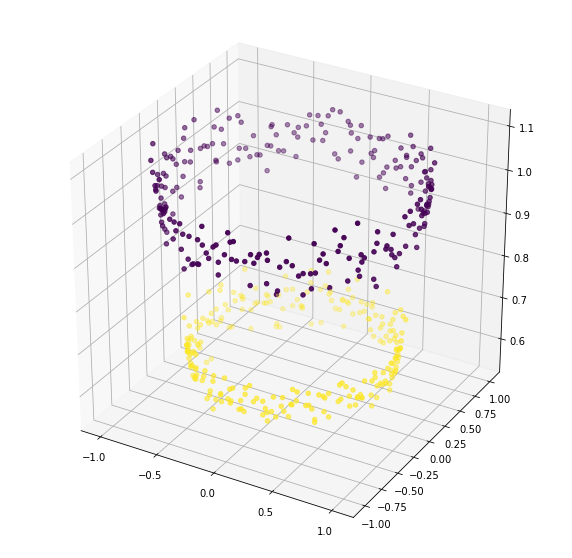

In [9]:
ax = plot3d(X_)

## Logistic classifier

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [11]:
lr = LogisticRegression()

In [12]:
cv_score = cross_val_score(lr,X,Y,cv=5)
print("CV Score",cv_score)
acc = cv_score.mean()
print("Accuracy X(2D) is %.4f"%(acc*100))

CV Score [0.48 0.45 0.44 0.44 0.49]
Accuracy X(2D) is 46.0000


## Logistic classifier on Higher Dimension

In [35]:
acc = cross_val_score(lr,X_,Y,cv=5).mean()
print("Accuracy X(3D) is %.4f"%(acc*100))

Accuracy X(3D) is 100.0000


## Visualize the Decision Surface

In [36]:
lr.fit(X_,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
# Wts
wts = lr.coef_
print(wts)

# Bias
bias = lr.intercept_
print(bias)

[[  0.02167641   0.03627148 -10.84950066]]
[8.8712432]


In [39]:
# Plane eqn=> ax+by+cz+d=0

In [40]:
xx, yy = np.meshgrid(range(-2,2),range(-2,2))
print(xx)
print(yy)

[[-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]]
[[-2 -2 -2 -2]
 [-1 -1 -1 -1]
 [ 0  0  0  0]
 [ 1  1  1  1]]


In [42]:
z = -(wts[0,0]*xx + wts[0,1]*yy+bias)/wts[0,2]
print(z)

[[0.8069816  0.80897952 0.81097744 0.81297535]
 [0.81032475 0.81232267 0.81432058 0.8163185 ]
 [0.8136679  0.81566581 0.81766373 0.81966165]
 [0.81701104 0.81900896 0.82100688 0.8230048 ]]


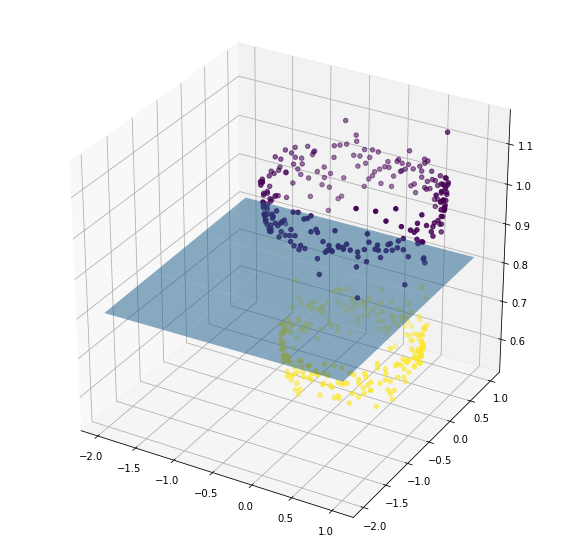

In [47]:
ax = plot3d(X_,False)
ax.plot_surface(xx,yy,z,alpha=0.5)
plt.show()